In [31]:
import numpy as np 
import time as t
import matplotlib.pyplot as plt

In [32]:
# def changeRows(A,b, row1, row2):
#     temp = np.copy(A[row1])
#     A[row1] = A[row2]
#     A[row2] = temp

#     temp_b = b[row1]
#     b[row1] = b[row2]
#     b[row2] = temp_b


def retroSubstitution(A,b):
    n = len(b)
    x = np.zeros(n)
    for i in range(n-1,-1,-1):
        sum_ax = 0
        sum_ax = A[i, i+1:] @ x[i+1:]  
        x[i] = (b[i] - sum_ax) / A[i, i]
    return x


def gaussianElimination(A,b): 
    n = len(b)
    for i in range(n): 
        pivot_index = i + np.argmax(np.abs(A[i:, i]))
        if pivot_index != i:
            A[[i, pivot_index]] = A[[pivot_index, i]]
            b[[i, pivot_index]] = b[[pivot_index, i]]
        if A[i, i] == 0:
            raise ValueError("Singular matrix.")
        multiplier = A[i+1:, i] / A[i, i]
        A[i+1:, i:] -= multiplier[:, None] * A[i, i:]
        b[i+1:] -= multiplier * b[i]
    
    x = retroSubstitution(A, b)
    return x

matrix = np.array([[1,1,1],
                   [2,2,5],
                   [4,6,8]], dtype=float)


b = np.array([8,0,-5], dtype=float)

solution = gaussianElimination(matrix,b)
print(solution)

[21.16666667 -7.83333333 -5.33333333]


Atividade 2

Tempo médio de execução para 3 eliminações: 51.890121 segundos


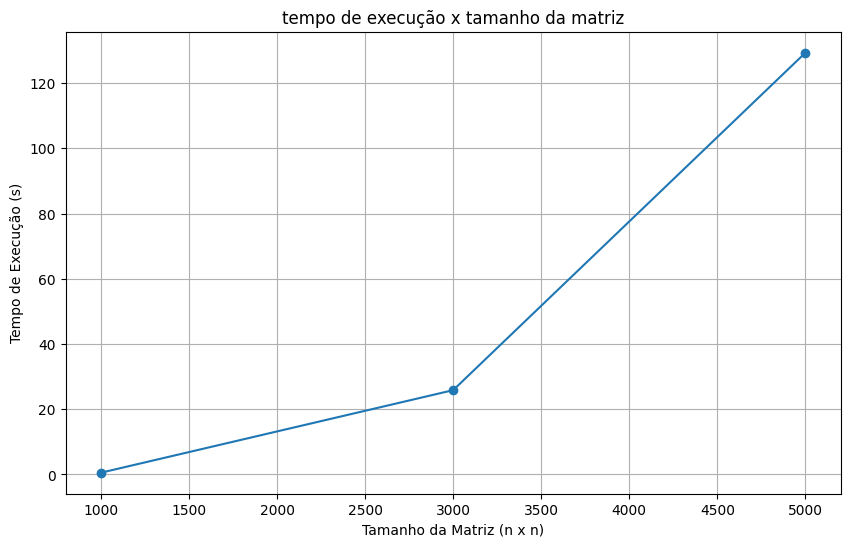

In [33]:
eliminations = 3
a, b = 1000, 5000

n_values = np.linspace(a, b, eliminations, dtype=int)
times = np.zeros(eliminations)
total_time = 0
k = 0

for i in n_values:
    A = np.random.rand(i, i)
    b = np.random.rand(i)

    start_time = t.time()
    solution = gaussianElimination(A, b)
    end_time = t.time()
    times[k] = end_time - start_time
    total_time += times[k]
    k += 1

average_time = total_time / eliminations

print(f"Tempo médio de execução para {eliminations} eliminações: {average_time:.6f} segundos")


plt.figure(figsize=(10, 6))
plt.plot(n_values, times, marker='o')
plt.title('tempo de execução x tamanho da matriz')
plt.xlabel('Tamanho da Matriz (n x n)')
plt.ylabel('Tempo de Execução (s)')
plt.grid()
plt.show()
